

# LIBRERIAS

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords de NLTK si aún no se han descargado
nltk.download('stopwords')
import datetime
import pandas as pd
import requests
import bs4
from urllib.parse import urlparse
import re
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from nltk.util import ngrams
!python -m spacy download es_core_news_sm
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

# Cargar el modelo de spaCy para el idioma específico
nlp = spacy.load('es_core_news_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 83.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# palabras clave

In [ ]:
# Definir las palabras clave
palabras_clave = [
    'sindicato', 'cgt', 'paritarias', 'sindicalista', 'sindicatos',
    'empleadas domésticas', 'casas particulares', 'daer', 'atilra',
    'aceiteros', 'camioneros', 'conciliación obligatoria', 'moyano',
    'despido', 'baradel', 'gremialista', 'medida de fuerza', 'gremio estatal',
    'trabajadores estatales', 'upcn', 'suterh', 'CGT', 'sindical', 'paro', 'ate',
    'intercargo', 'piquete', 'cese de actividades', 'plan de lucha']

# TN COMPLETO

Devuelve los siguientes DF: la tabla original con titulares y enlaces
la tabla con nombres
la tabla con textos
la tablado con frecuencia de nombres
frecuencia trigrams y bigrams
nube de palabras completa y nube de palabas con nombres propios


- SCRAPEA LAS NOTICIAS COMPLETAS DE LA HOME (GENERA CSV DE TODAS LAS NOTICIAS / TITULARES)
- LEVANTA LOS TEXTOS (GENERA CSV DE TODAS + TEXTO)
- FILTRA PALABRAS CLAVE (GENERA CSV SOLO CON AQUELLAS NOTICIAS QUE TIENEN PALABRAS CLAVE TANTO TITULARES COMO TEXTO / CSV FILTRADO)
- GENERA VISUALIZACIONES TANTO DEL PORCENTAJE TOTAL SOBRE FILTRADO + NUBE DE PALABRAS DE TITULARES + TABLAS DE BIGRAMS Y TRIGRAMS
- TOMA SOLO EL CSV FILTRADO (EL QUE CONTIENE LAS NOTICIAS TEXTO Y TITULARES SOLO DE LAS PALABRAS CLAVE) Y BUSCA LOS NOMBRES PROPIOS, TAMBIÉN GENERA UN CSV CON ESA NUEVA COLUMNA, LAS FRECUENCIAS Y LAS NUBES DE PALABRAS SIEMPRE QUE HAYA NOMBRES PROPIOS.

Se escrapearon 102 títulos de TN
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
El enlace proporcionado es None.
          titulos enlaces texto_noticia
0   Temas de hoy:    None              
1  Dólar oficial:    None              
2     Dólar blue:    None              
3      Dólar MEP:    None              
4  Dólar tarjeta:    None              
                                              titulos  \
41  La pregunta de Mirtha Legrand sobre Facundo Mo...   

                                              enlaces  \
41  /show/television/2024/12/15/la-pregunta-de-mir...   

                                        texto_noticia  contiene_palabra_clave  
41  Eva Bargiela estuvo como invitada este sábado ...                    True  
Nombres propios encontrados en los titulares filtrados:
                 

<ipython-input-3-e777ebd63e11>:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


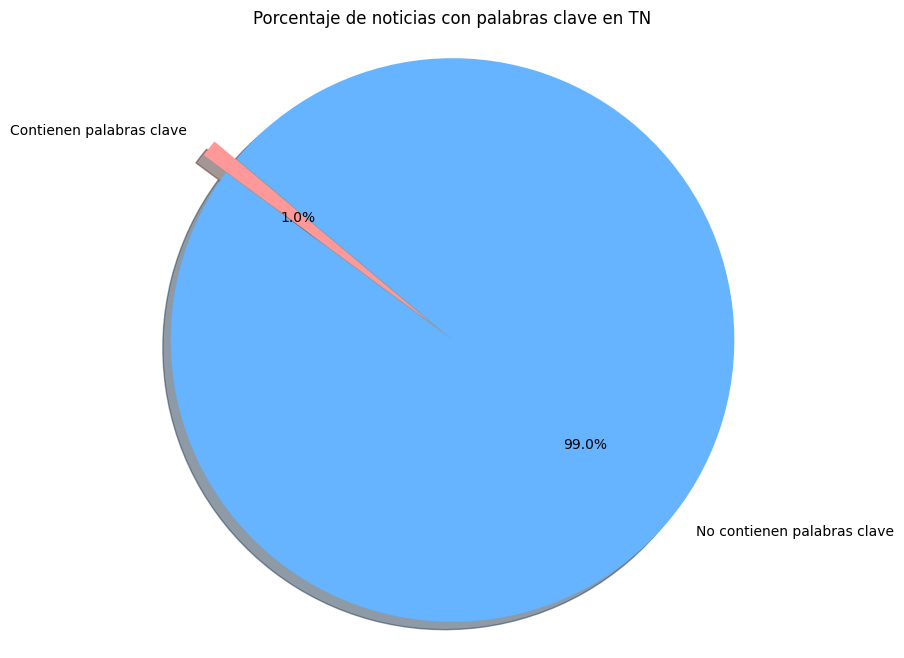

<Figure size 640x480 with 0 Axes>

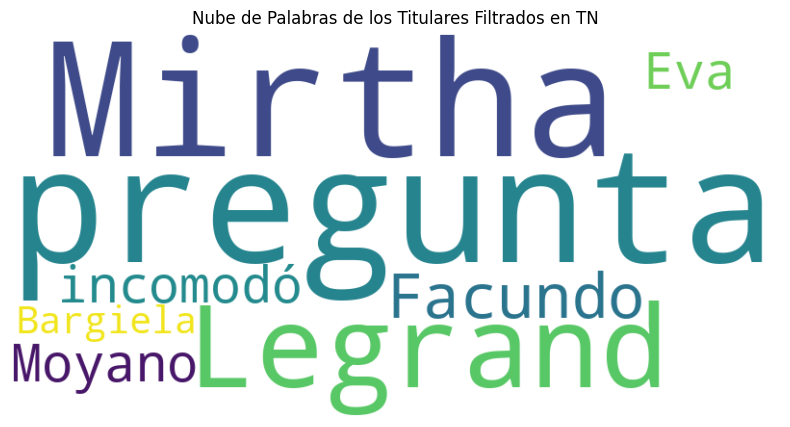

<ipython-input-3-e777ebd63e11>:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


Nombres propios encontrados en los textos filtrados:
                                        texto_noticia  \
41  Eva Bargiela estuvo como invitada este sábado ...   

                                  nombres_propios  
41  [Eva Bargiela, Cholo Simeone, Facundo Moyano]  


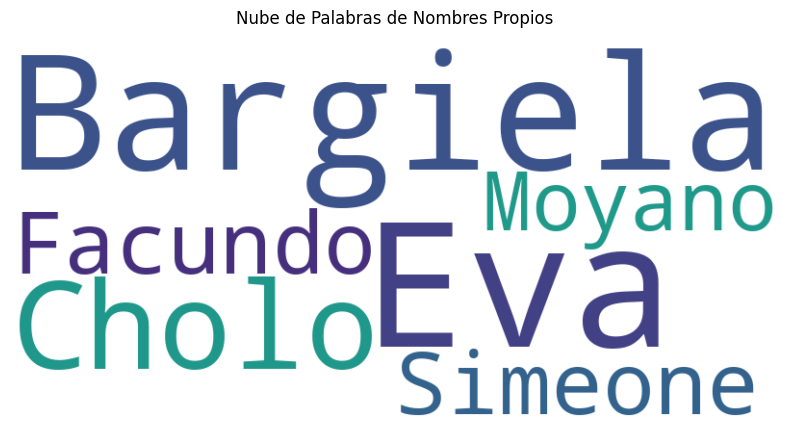

Tabla de Frecuencias de Nombres Propios:
  Nombre Propio  Frecuencia
0           Eva           1
1      Bargiela           1
2         Cholo           1
3       Simeone           1
4       Facundo           1
5        Moyano           1


In [ ]:
# Definir los contadores de bigramas y trigramas
bigrams_counter = Counter()
trigrams_counter = Counter()

# Definir la fecha actual
hoy = datetime.datetime.today()
fecha_hoy = datetime.datetime.strftime(hoy, '%d-%m-%Y')

def scraper_noticias(url, nombre_diario, dominio, palabras_clave=None):
    consulta = requests.get(url)
    informacion_parseada = bs4.BeautifulSoup(consulta.text, 'html.parser')
    informacion_filtrada = informacion_parseada.find_all('h2')

    lista_titulos = []
    lista_enlaces = []

    for elemento in informacion_filtrada:
        titulo = elemento.text.strip()
        enlace_tag = elemento.find('a')

        if enlace_tag:
            enlace = enlace_tag.get('href')
        else:
            enlace = None  # Opcional: Puedes asignar un valor como 'Sin enlace' si prefieres

        lista_titulos.append(titulo)
        lista_enlaces.append(enlace)

    df = pd.DataFrame({'titulos': lista_titulos, 'enlaces': lista_enlaces})


    df.to_csv(f'tabla_{nombre_diario}_{fecha_hoy}.csv', index=False, encoding='utf-8')

    cantidad_noticias = len(lista_titulos)

    print(f'Se escrapearon {cantidad_noticias} títulos de {nombre_diario}')

    return df

def extraer_texto_noticia(enlace, dominio):
    try:
        if not enlace:
            print('El enlace proporcionado es None.')
            return None

        # Parsear el enlace para verificar si tiene un esquema
        parsed_url = urlparse(enlace)
        if not parsed_url.scheme:
            enlace = f'{dominio}{enlace}'  # Agregar el dominio si no tiene esquema

        # Realizar la solicitud GET
        respuesta = requests.get(enlace)
        respuesta.raise_for_status()  # Verificar si la solicitud fue exitosa

        # Parsear el contenido HTML
        soup = bs4.BeautifulSoup(respuesta.text, 'html.parser')

        # Encontrar el contenido de la noticia
        contenido_noticia = soup.find('p')
        if contenido_noticia:
            texto_noticia = contenido_noticia.text.strip()
            return texto_noticia
        else:
            print(f'No se encontró contenido de noticia en {enlace}')
            return None

    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la noticia desde {enlace}: {str(e)}')
        return None
    except Exception as e:
        print(f'Error inesperado al procesar la noticia desde {enlace}: {str(e)}')
        return None

def contiene_palabra_clave_exacta(texto, patron):
    return bool(re.search(patron, texto, re.IGNORECASE))

# Lista de medios con el dominio
lista_medios = [
    ['https://tn.com.ar/', 'TN', 'https://tn.com.ar']
]


# Crear un patrón de expresión regular para palabras exactas
patron = r'\b(?:' + '|'.join(re.escape(palabra) for palabra in palabras_clave) + r')\b'

# Iterar sobre cada medio
for medio in lista_medios:
    df_noticias = scraper_noticias(url=medio[0], nombre_diario=medio[1], dominio=medio[2])

    # Lista para almacenar los textos de noticias
    textos_noticias = []

    for index, row in df_noticias.iterrows():
        enlace = row['enlaces']
        texto_noticia = extraer_texto_noticia(enlace, medio[2])

        if texto_noticia:
            textos_noticias.append(texto_noticia)
        else:
            textos_noticias.append('')  # Agregar una cadena vacía si no se pudo obtener el texto

    # Verificar si la longitud de 'textos_noticias' coincide con la longitud del DataFrame
    if len(textos_noticias) == len(df_noticias):
        # Agregar la columna 'texto_noticia' al DataFrame df_noticias
        df_noticias['texto_noticia'] = textos_noticias

        # Mostrar el DataFrame con la nueva columna
        print(df_noticias.head())  # Mostrar las primeras filas para verificar

        # Guardar el DataFrame con la nueva columna en un archivo CSV
        archivo_con_texto = f'tabla_{medio[1]}_{fecha_hoy}_con_texto.csv'
        df_noticias.to_csv(archivo_con_texto, index=False, encoding='utf-8')

        # Cargar el DataFrame desde el archivo CSV
        df = pd.read_csv(archivo_con_texto, encoding='utf-8')

        # Aplicar la función contiene_palabra_clave_exacta a cada fila del DataFrame
        df['contiene_palabra_clave'] = df['texto_noticia'].apply(lambda x: contiene_palabra_clave_exacta(str(x), patron))

        # Filtrar las filas que contienen alguna palabra clave exacta
        df_filtrado = df[df['contiene_palabra_clave']]

        # Mostrar el DataFrame filtrado
        print(df_filtrado.head())

        # Guardar el DataFrame filtrado en un nuevo archivo CSV
        archivo_filtrado = f'tabla_{medio[1]}_{fecha_hoy}_filtrado.csv'
        df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')
    else:
        print(f"La longitud de 'textos_noticias' no coincide con la longitud del DataFrame de {medio[1]}.")

# Agregar la columna 'nombres_propios' al DataFrame filtrado
df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
archivo_filtrado = f'tabla_{medio[1]}_{fecha_hoy}_filtrado.csv'
df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Contar la cantidad de noticias filtradas
cantidad_true = df_filtrado.shape[0]

# Imprimir la cantidad de noticias filtradas
print(f'Cantidad de noticias que contienen palabras clave en {medio[1]}: {cantidad_true}')

#Porcentaje de noticias con palabras clave respecto al total
porcentaje = (cantidad_true / len(df_noticias)) * 100
print(f'El {porcentaje:.2f}% de las noticias de {medio[1]} contienen palabras clave.')

# Tokenizar los títulos filtrados, eliminar stopwords y actualizar los contadores de bigramas y trigramas
for titulo in df_filtrado['titulos']:
  tokens = [token.text for token in nlp(titulo) if token.text.lower() not in stop_words]
  bigrams = ngrams(tokens, 2)
  trigrams = ngrams(tokens, 3)

  bigrams_counter.update(bigrams)
  trigrams_counter.update(trigrams)

# Crear DataFrames para bigramas y trigramas y ordenarlas de mayor a menor
  bigrams_df = pd.DataFrame(bigrams_counter.items(), columns=['Bigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)
  trigrams_df = pd.DataFrame(trigrams_counter.items(), columns=['Trigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Agregar el nombre del medio como una columna en los DataFrames de bigramas y trigramas
bigrams_df['Medio'] = medio[1]
trigrams_df['Medio'] = medio[1]

# Guardar las frecuencias de bigramas y trigramas en archivos CSV con codificación utf-8
bigrams_df.to_csv(f'frecuencia_bigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')
trigrams_df.to_csv(f'frecuencia_trigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')

# Unir todos los nombres propios en un solo texto
nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

# Generar el gráfico de torta
labels = ['Contienen palabras clave', 'No contienen palabras clave']
sizes = [cantidad_true, len(df_noticias) - cantidad_true]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explotar el primer segmento

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Porcentaje de noticias con palabras clave en {medio[1]}')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Guardar el gráfico como imagen
plt.savefig("grafico_torta_palabras_clave.png", dpi=300, bbox_inches='tight')

#Generar la nube de palabras con los titulares filtrados
stop_words = set(stopwords.words('spanish'))

# Unir todos los titulares filtrados en un solo texto
texto_filtrado = ' '.join(df_filtrado['titulos'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(texto_filtrado)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de Palabras de los Titulares Filtrados en {medio[1]}')
plt.show()

# Guardar la nube de palabras como archivo PNG
nube_palabras_path = f'nube_palabras_{medio[1]}_{fecha_hoy}.png'
wordcloud.to_file(nube_palabras_path)

#CODIGO PARA EXTRAER LOS NOMBRES PROPIOS DEL CSV FILTRADO DE TN

def extraer_nombres_propios_y_generar_informes(df_filtrado, nombre_archivo_salida):
    # Cargar el modelo de spaCy para el idioma específico
    nlp = spacy.load('es_core_news_sm')

    # Extraer nombres propios y crear una nueva columna en el DataFrame
    df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

    # Mostrar los nombres propios encontrados
    print("Nombres propios encontrados en los textos filtrados:")
    print(df_filtrado[['texto_noticia', 'nombres_propios']])

    # Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
    df_filtrado.to_csv(nombre_archivo_salida, index=False, encoding='utf-8')

    # Unir todos los nombres propios en un solo texto
    nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

    # Verificar si hay nombres propios
    if nombres_propios_texto.strip():  # Si el texto no está vacío
        # Crear la nube de palabras para los nombres propios
        wordcloud_nombres_propios = WordCloud(stopwords=set(stopwords.words('spanish')), background_color='white', width=800, height=400).generate(nombres_propios_texto)

        # Mostrar la nube de palabras para los nombres propios
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_nombres_propios, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras de Nombres Propios')
        plt.show()

        # Guardar la nube de palabras de nombres propios como archivo PNG
        nube_palabras_nombres_path = f'nube_nombres_propios_{medio[1]}_{fecha_hoy}.png'
        wordcloud_nombres_propios.to_file(nube_palabras_nombres_path)

        # Generar una tabla de frecuencias de los nombres propios
        nombres_frecuencia = Counter(nombres_propios_texto.split())
        df_frecuencia_nombres = pd.DataFrame(nombres_frecuencia.items(), columns=['Nombre Propio', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

        # Mostrar la tabla de frecuencias
        print("Tabla de Frecuencias de Nombres Propios:")
        print(df_frecuencia_nombres.head(10))  # Mostrar las 10 frecuencias más altas

        # Guardar la tabla de frecuencias en un archivo CSV
        archivo_frecuencia = nombre_archivo_salida.replace('.csv', '_frecuencia_nombres.csv')
        df_frecuencia_nombres.to_csv(archivo_frecuencia, index=False, encoding='utf-8')

        return df_filtrado, df_frecuencia_nombres
    else:
        print("No se encontraron nombres propios en las noticias filtradas.")
        return df_filtrado, pd.DataFrame(columns=['Nombre Propio', 'Frecuencia'])  # Devolver un DataFrame vacío

#LLAMA A LA FUNCIÓN PARA GENERAR NUBES DE PALABRAS Y FRECUENCIA SIEMPRE QUE HAYA NOMBRES PROPIOS
df_filtrado, df_frecuencia_nombres = extraer_nombres_propios_y_generar_informes(df_filtrado, f'tabla_{medio[1]}_filtrado_con_nombres.csv')

# INFOBAE COMPLETO

CON ESTA FUNCIÓN SE INDICA QUÉ ELEMENTOS RECORRER DEL SITIO WEB
EN ESTE CASO VA A BUSCAR TODOS LOS A (ENLACES) QUE TIENEN COMO CLASE STORY-CARD-CTN
LUEGO DENTRO DE CADA ENLACE SE ACLARA CUÁL ES EL TITULAR (H2 CLASS STORYCARD...) Y CUÁL ES EL LINK
AMBOS DATOS LOS GUARDA EN LAS VARIABLES LISTA_TITULOS Y LISTA_ENLACES
DESPUÉS HAY UN MANEJO DE POSIBLE INFO VACÍA ("ELSE...")
LOS APPEND SIRVEN PARA IR AGREGANDO TITULARES Y ENLACES
GENERA LOS DATA FRAME (TABLAS) CON EL NOMBRE DEL MEDIO Y LA FECHA

Se escrapearon 118 títulos de Infobae
                                             titulos  \
0  Derrota piquetera en la Ciudad de Buenos Aires...   
1  Por qué crece la base monetaria pero no impact...   
2  Jimena Barón confirmó que espera un hijo con M...   
3  Qué se sabe hasta ahora del gendarme argentino...   
4  Por qué Kueider es investigado por enriquecimi...   

                                             enlaces  \
0  https://infobae.com/politica/2024/12/15/derrot...   
1  https://infobae.com/economia/2024/12/15/por-qu...   
2  https://infobae.com/teleshow/2024/12/15/jimena...   
3  https://infobae.com/politica/2024/12/15/que-se...   
4  https://infobae.com/politica/2024/12/15/por-qu...   

                                       texto_noticia  
0  Los piquetes y manifestaciones en la Ciudad de...  
1  El crecimiento de la base monetaria alcanzó un...  
2  Jimena Barón confirmó que está embarazada de s...  
3  Agustín Nahuel Gallo, cabo primero de la Genda...  
4  En 2019, u

<ipython-input-4-d8e35043368b>:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


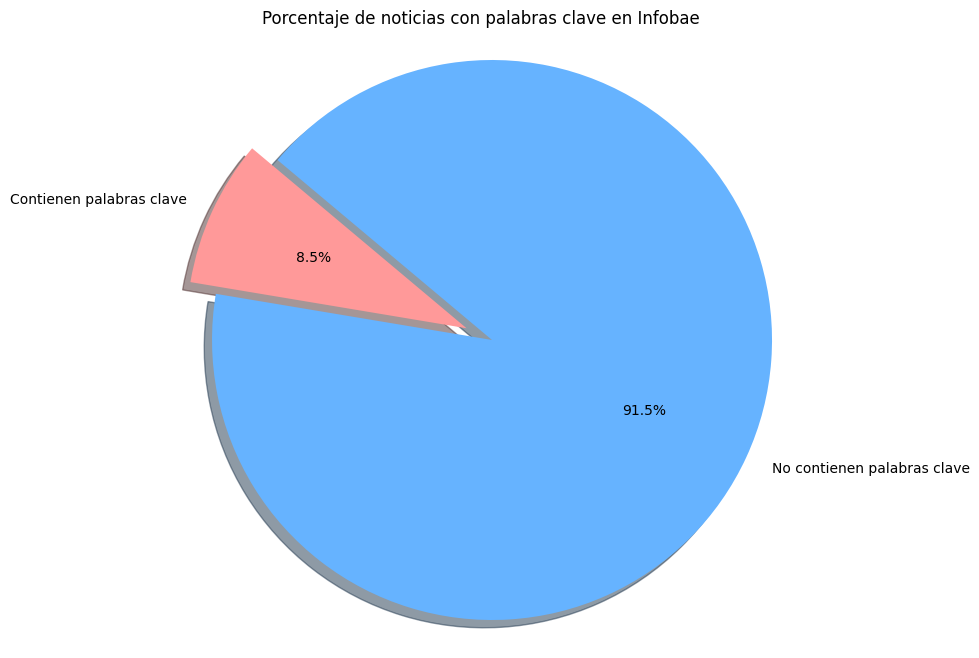

<Figure size 640x480 with 0 Axes>

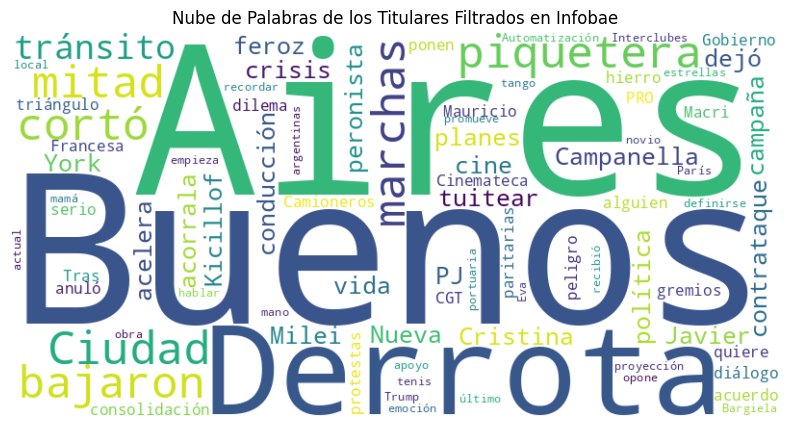

<ipython-input-4-d8e35043368b>:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


Nombres propios encontrados en los textos filtrados:
                                         texto_noticia  \
0    Los piquetes y manifestaciones en la Ciudad de...   
6    Sonríe ante su confusión, o su testarudez, en ...   
8    El ex senador Edgardo Kueider no debe poder cr...   
9    El viernes Cristina Kirchner llegó exultante a...   
16   Javier Milei ostenta varios récords, pero tien...   
36   La CGT comenzó una nueva etapa sin Pablo Moyan...   
79   La Cinemateca Francesa anunció la anulación de...   
90   Donald Trump, presidente electo de Estados Uni...   
97   Comenzó la Ronda Campeonato con los cuartos de...   
107  Este sábado, Mirtha Legrand volvió a sentarse ...   

                                       nombres_propios  
0    [Jorge Macri, Pero, Sandra Pettovello, Macri, ...  
6    [Sonríe, Juan José Campanella, Muhammad Ali, C...  
8    [Edgardo Kueider, Gustavo Bordet, De allí lleg...  
9    [Cristina Kirchner, Luis Barrionuevo, Néstor, ...  
16   [Javier Milei, Gab

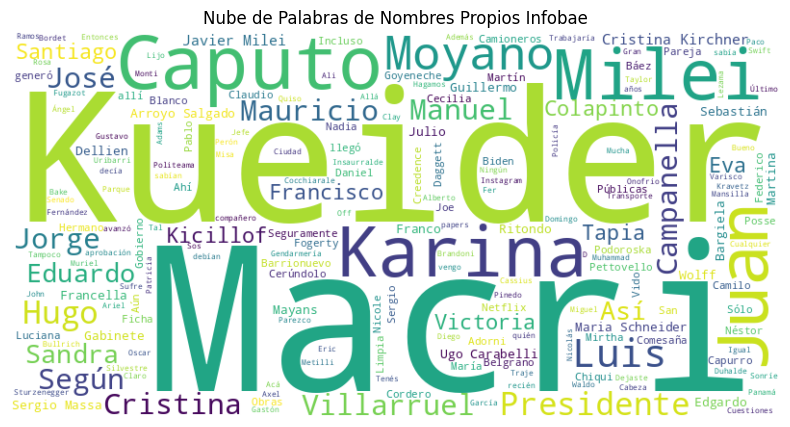

Tabla de Frecuencias de Nombres Propios Infobae:
    Nombre Propio  Frecuencia
108       Kueider          15
1           Macri          15
146         Milei          13
169        Moyano           9
200        Caputo           9
24           Juan           9
134      Cristina           8
7              de           8
162        Karina           8
228          Hugo           6


In [ ]:
# Definir la fecha actual
hoy = datetime.datetime.today()
fecha_hoy = datetime.datetime.strftime(hoy, '%d-%m-%Y')

def scraper_noticias(url, nombre_diario, dominio, palabras_clave=None):
    consulta = requests.get(url)
    informacion_parseada = bs4.BeautifulSoup(consulta.text, 'html.parser')

    # Selecciona todos los contenedores de las noticias
    informacion_filtrada = informacion_parseada.find_all('a', class_='story-card-ctn')

    lista_titulos = []
    lista_enlaces = []

    for elemento in informacion_filtrada:
        # Encuentra el título dentro de cada 'a'
        titulo_tag = elemento.find('h2', class_='story-card-hl headline-link')
        enlace_tag = elemento.get('href')

        if titulo_tag:
            titulo = titulo_tag.text.strip()
        else:
            titulo = 'Sin título'  # Puedes cambiar este valor si prefieres manejar los casos sin título de otra manera

        if enlace_tag:
            # Si el enlace no es completo, añade el dominio
            if not urlparse(enlace_tag).scheme:
                enlace = f'{dominio}{enlace_tag}'
        else:
            enlace = 'Sin enlace'  # Opcional: Puedes asignar un valor como 'Sin enlace' si prefieres

        lista_titulos.append(titulo)
        lista_enlaces.append(enlace)

    # Generar DataFrame con los títulos y enlaces
    df = pd.DataFrame({'titulos': lista_titulos, 'enlaces': lista_enlaces})

    df.to_csv(f'tabla_{nombre_diario}_{fecha_hoy}.csv', index=False, encoding='utf-8')

    cantidad_noticias = len(lista_titulos)

    print(f'Se escrapearon {cantidad_noticias} títulos de {nombre_diario}')

    return df

#ESTA FUNCIÓN PERMITE EXTRAER EL TEXTO DE LA NOTICIA
# LO PRIMERO Q TIENE SON MANEJO DE ERRORES, POR EJ SI EL SITIO ESTÁ CAIDO
#DESP VA A BUSCAR EL TEXTO DENTRO DE LA ESTRUCTURA P (PÁRRAFO) Y LUEGO AGRUPA TODOS ESOS PÁRRAFOS

def extraer_texto_noticia(enlace, dominio):
    try:
        if not enlace:
            print('El enlace proporcionado es None.')
            return None

        parsed_url = urlparse(enlace)
        if not parsed_url.scheme:
            enlace = f'{dominio}{enlace}'  # Agregar el dominio si no tiene esquema

        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        }

        respuesta = requests.get(enlace, headers=headers)
        respuesta.raise_for_status()

        soup = bs4.BeautifulSoup(respuesta.text, 'html.parser')

        # Busca los párrafos dentro de la clase "paragraph"
        contenido_noticia = soup.find_all('p', class_='paragraph')

        if contenido_noticia:
            # Combina todos los párrafos en un solo texto
            texto_noticia = ' '.join([p.text.strip() for p in contenido_noticia])
            return texto_noticia
        else:
            print(f'No se encontró contenido de noticia en {enlace}')
            return None

    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la noticia desde {enlace}: {str(e)}')
        return None
    except Exception as e:
        print(f'Error inesperado al procesar la noticia desde {enlace}: {str(e)}')
        return None

#ESTA FUNCIÓN BUSCA LAS PALABRAS CLAVE
def contiene_palabra_clave_exacta(texto, patron):
    return bool(re.search(patron, texto, re.IGNORECASE))

#ACÁ SE GENERA LA VARIABLE CON LA LISTA DE MEDIOS / TIENE TRES ELEMENTOS PORQUE UNA ES EL PORTAL EN SÍ
# Y LA OTRA ES EL DOMINIO ADEMÁS DEL NOMBRE DEL MEDIO
# Lista de medios con el dominio
lista_medios = [
    ['https://infobae.com/?noredirect', 'Infobae', 'https://infobae.com']
]


#ESTO SE LLAMA EXPRESIÓN REGULAR
#palabras_clave: Esta es una lista de palabras clave a buscar en un texto.
#re.escape(palabra): Esta función escapa caracteres especiales en cada palabra clave.
#Esto es importante porque algunas palabras pueden contener caracteres que tienen un significado
#especial en las expresiones regulares (como . o *). Escapar estos caracteres asegura que se traten como literales.
#'|'.join(...): Esto une las palabras clave escapadas con el operador |, que en expresiones regulares actúa como un "o". Es decir, la expresión regular buscará cualquiera de las palabras clave.
#\b es un delimitador de palabra, que asegura que las palabras clave que se encuentren estén aisladas (no como parte de otras palabras).
#(?: ... ) es un grupo sin captura. Esto significa que las palabras dentro del grupo se consideran para la coincidencia, pero no se almacenan como un grupo que se puede referenciar posteriormente.
# EJEMPLO: \b(?:gato|perro)\b Esto significa que buscará "gato" o "perro" como palabras completas en el texto.

patron = r'\b(?:' + '|'.join(re.escape(palabra) for palabra in palabras_clave) + r')\b'


#ESTA PARTE DE LA FUNCIÓN ES LA QUE RECORRE EL PORTAL, ES DECIR, ACTIVA EL PROCESO DEFINIDO ARRIBA.
#HACE UNA TABLA QUE CONTIENE TODAS LAS NOICIAS (TITULAR Y ENLACE)
#UNA SEGUNDA TABLA QUE LE AGREGA A ESA INFORMACIÓN EL TEXTO DE LA NOTICIA (PARA ESO ESTÁ DEFINIDA LA FUNCION DEF EXTRAER TEXTO)
#UNA TERCERA TABLA QUE FILTRA POR PALABRAS CLAVE Y DEVUELVE TITULO, ENLACE Y TEXTO SOLO DE ESAS NOTICIAS.

for medio in lista_medios:
    df_noticias = scraper_noticias(url=medio[0], nombre_diario=medio[1], dominio=medio[2])

    if df_noticias is not None:
        textos_noticias = []

        for index, row in df_noticias.iterrows():
            enlace = row['enlaces']
            texto_noticia = extraer_texto_noticia(enlace, medio[2])

            if texto_noticia:
                textos_noticias.append(texto_noticia)
            else:
                textos_noticias.append('')

        if len(textos_noticias) == len(df_noticias):
            df_noticias['texto_noticia'] = textos_noticias

            print(df_noticias.head())

            archivo_con_texto = f'tabla_{medio[1]}_{fecha_hoy}_con_texto.csv'
            df_noticias.to_csv(archivo_con_texto, index=False, encoding='utf-8')

            df = pd.read_csv(archivo_con_texto, encoding='utf-8')

            df['contiene_palabra_clave'] = df['texto_noticia'].apply(lambda x: contiene_palabra_clave_exacta(str(x), patron))

            df_filtrado = df[df['contiene_palabra_clave']]

            print(df_filtrado.head())

            archivo_filtrado = f'tabla_{medio[1]}_fecha_hoy_filtrado.csv'
            df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')
        else:
            print(f"La longitud de 'textos_noticias' no coincide con la longitud del DataFrame de {medio[1]}.")

# Agregar la columna 'nombres_propios' al DataFrame filtrado
df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
archivo_filtrado = f'tabla_{medio[1]}_{fecha_hoy}_filtrado.csv'
df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Contar la cantidad de noticias filtradas
cantidad_true = df_filtrado.shape[0]

# Imprimir la cantidad de noticias filtradas
print(f'Cantidad de noticias que contienen palabras clave en {medio[1]}: {cantidad_true}')

#Porcentaje de noticias con palabras clave respecto al total
porcentaje = (cantidad_true / len(df_noticias)) * 100
print(f'El {porcentaje:.2f}% de las noticias de {medio[1]} contienen palabras clave.')

# Tokenizar los títulos filtrados, eliminar stopwords y actualizar los contadores de bigramas y trigramas
for titulo in df_filtrado['titulos']:
  tokens = [token.text for token in nlp(titulo) if token.text.lower() not in stop_words]
  bigrams = ngrams(tokens, 2)
  trigrams = ngrams(tokens, 3)

  bigrams_counter.update(bigrams)
  trigrams_counter.update(trigrams)

# Crear DataFrames para bigramas y trigramas y ordenarlas de mayor a menor
  bigrams_df = pd.DataFrame(bigrams_counter.items(), columns=['Bigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)
  trigrams_df = pd.DataFrame(trigrams_counter.items(), columns=['Trigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Agregar el nombre del medio como una columna en los DataFrames de bigramas y trigramas
bigrams_df['Medio'] = medio[1]
trigrams_df['Medio'] = medio[1]

# Guardar las frecuencias de bigramas y trigramas en archivos CSV con codificación utf-8
bigrams_df.to_csv(f'frecuencia_bigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')
trigrams_df.to_csv(f'frecuencia_trigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')

# Unir todos los nombres propios en un solo texto
nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

# Generar el gráfico de torta
labels = ['Contienen palabras clave', 'No contienen palabras clave']
sizes = [cantidad_true, len(df_noticias) - cantidad_true]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explotar el primer segmento

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Porcentaje de noticias con palabras clave en {medio[1]}')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Guardar el gráfico como imagen
plt.savefig("grafico_torta_palabras_clave.png", dpi=300, bbox_inches='tight')

#Generar la nube de palabras con los titulares filtrados
stop_words = set(stopwords.words('spanish'))

# Unir todos los titulares filtrados en un solo texto
texto_filtrado = ' '.join(df_filtrado['titulos'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(texto_filtrado)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de Palabras de los Titulares Filtrados en {medio[1]}')
plt.show()

# Guardar la nube de palabras como archivo PNG
nube_palabras_path = f'nube_palabras_{medio[1]}_{fecha_hoy}.png'
wordcloud.to_file(nube_palabras_path)

#CODIGO PARA EXTRAER LOS NOMBRES PROPIOS DEL CSV FILTRADO DE INFOBAE

def extraer_nombres_propios_y_generar_informes(df_filtrado, nombre_archivo_salida):
    # Cargar el modelo de spaCy para el idioma específico
    nlp = spacy.load('es_core_news_sm')

    # Extraer nombres propios y crear una nueva columna en el DataFrame
    df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

    # Mostrar los nombres propios encontrados
    print("Nombres propios encontrados en los textos filtrados:")
    print(df_filtrado[['texto_noticia', 'nombres_propios']])

    # Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
    df_filtrado.to_csv(nombre_archivo_salida, index=False, encoding='utf-8')

    # Unir todos los nombres propios en un solo texto
    nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

    # Verificar si hay nombres propios
    if nombres_propios_texto.strip():  # Si el texto no está vacío
        # Crear la nube de palabras para los nombres propios
        wordcloud_nombres_propios = WordCloud(stopwords=set(stopwords.words('spanish')), background_color='white', width=800, height=400).generate(nombres_propios_texto)

        # Mostrar la nube de palabras para los nombres propios
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_nombres_propios, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras de Nombres Propios Infobae')
        plt.show()

        # Guardar la nube de palabras de nombres propios como archivo PNG
        nube_palabras_nombres_path = f'nube_nombres_propios_{medio[1]}_{fecha_hoy}.png'
        wordcloud_nombres_propios.to_file(nube_palabras_nombres_path)

        # Generar una tabla de frecuencias de los nombres propios
        nombres_frecuencia = Counter(nombres_propios_texto.split())
        df_frecuencia_nombres = pd.DataFrame(nombres_frecuencia.items(), columns=['Nombre Propio', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

        # Mostrar la tabla de frecuencias
        print("Tabla de Frecuencias de Nombres Propios Infobae:")
        print(df_frecuencia_nombres.head(10))  # Mostrar las 10 frecuencias más altas

        # Guardar la tabla de frecuencias en un archivo CSV
        archivo_frecuencia_Infobae = nombre_archivo_salida.replace('.csv', '_frecuencia_nombres.csv')
        df_frecuencia_nombres.to_csv(archivo_frecuencia_Infobae, index=False, encoding='utf-8')

        return df_filtrado, df_frecuencia_nombres
    else:
        print("No se encontraron nombres propios en las noticias filtradas.")
        return df_filtrado, pd.DataFrame(columns=['Nombre Propio', 'Frecuencia'])  # Devolver un DataFrame vacío

#LLAMA A LA FUNCIÓN PARA GENERAR NUBES DE PALABRAS Y FRECUENCIA SIEMPRE QUE HAYA NOMBRES PROPIOS
df_filtrado, df_frecuencia_nombres = extraer_nombres_propios_y_generar_informes(df_filtrado, f'tabla_{medio[1]}_{fecha_hoy}_filtrado_con_nombres.csv')

# LA NACION

La diferencia fundamental de este código es que tiene inicio de sesión. Se agrega login para ingresar al sitio web.

Login exitoso
Se escrapearon 127 títulos de La Nacion
                                             titulos  \
0  El enigma Kueider. Una nube radiactiva sobre e...   
1             Análisis. Cristina es peor que Kueider   
2  La crisis opositora. Un peronismo atrapado en ...   
3  "Estoy aquí, entero". Lula fue dado de alta tr...   
4  “La Misa”, desde adentro. El ritual del “Gordo...   

                                             enlaces  \
0  https://lanacion.com.ar/politica/milei-y-el-ca...   
1  https://lanacion.com.ar/opinion/cristina-es-pe...   
2  https://lanacion.com.ar/politica/la-crisis-opo...   
3  https://lanacion.com.ar/el-mundo/lula-da-silva...   
4  https://lanacion.com.ar/politica/la-misa-desde...   

                                       texto_noticia  
0  La sombra de la corrupción amargó los festejos...  
1  La hipocresía les sienta bien a ciertos dirige...  
2  Hace muchos años el peronismo no protagonizaba...  
3  SAN PABLO.- El presidente de Brasil, Luiz Inác...

<ipython-input-5-8424e4b71bc5>:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


Nombres propios encontrados en los titulares filtrados:
                                               titulos nombres_propios
2    La crisis opositora. Un peronismo atrapado en ...              []
4    “La Misa”, desde adentro. El ritual del “Gordo...              []
12   Documentación inédita. Los desconcertantes pag...              []
31   27 millones de dólares. Se define la primera p...              []
45   "Me angustia mucho". La pregunta de Mirtha Leg...  [Eva Bargiela]
64   Milei, frente a una pelea inminente y sin band...              []
85   27 millones de dólares. Se define la primera p...              []
89   Nuevo DT de Argentinos Juniors. Nicolás Diez: ...              []
105  "Todo empieza en la mente". Las razones por la...              []
Nombres propios encontrados en los titulares filtrados:
                                               titulos nombres_propios
2    La crisis opositora. Un peronismo atrapado en ...              []
4    “La Misa”, desde adentro. El ri

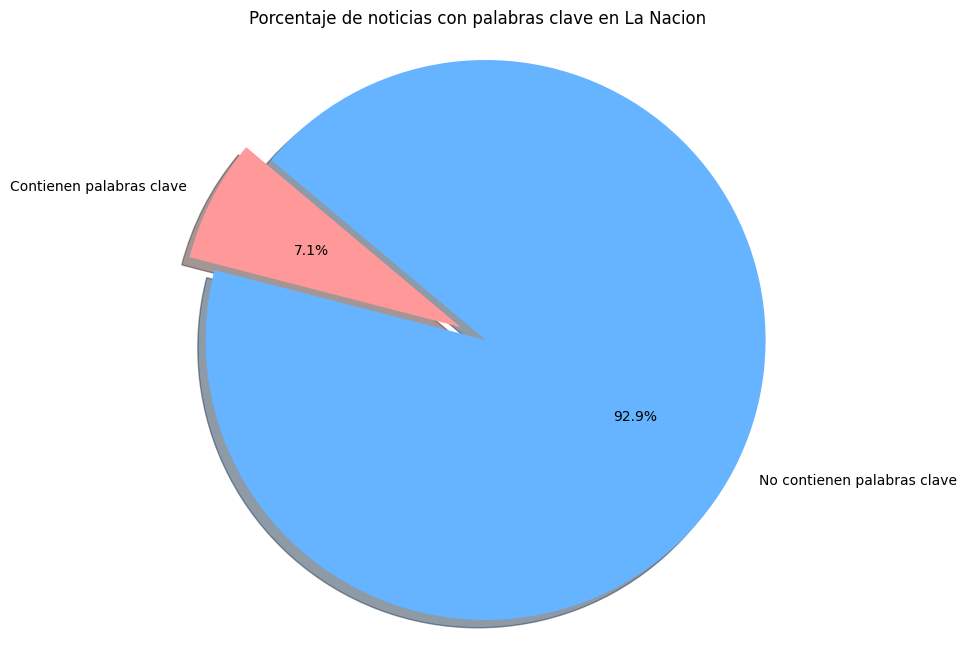

<Figure size 640x480 with 0 Axes>

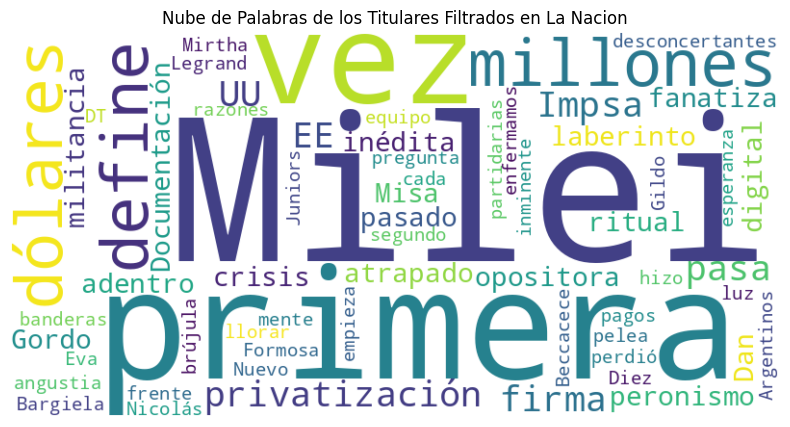

<ipython-input-5-8424e4b71bc5>:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])


Nombres propios encontrados en los textos filtrados:
                                         texto_noticia  \
2    Hace muchos años el peronismo no protagonizaba...   
4    El verano se precipita el viernes a la noche e...   
12   FORMOSA-. Del clientelismo, el control polític...   
31   Para el Gobierno es un hecho. “Impsa va a ser ...   
45   Eva Bargiela no pudo evitar romper en llanto a...   
64   En la semana en que el Gobierno celebró el éxi...   
85   Para el Gobierno es un hecho. “Impsa va a ser ...   
89   Argentinos Juniors intenta retomar la senda pe...   
105  Recientemente vino a la Argentina el profesor ...   

                                       nombres_propios  
2    [Cristina Kirchner, Chiche Duhalde, Carmen de ...  
4    [Santiago Caputo, Agustín Romo, Juan Pablo Car...  
12   [Gildo Insfrán, jamás, Insfrán, Liliana Noemí ...  
31   [“Impsa, Arc Energy, “Buscamos, Enrique Pescar...  
45   [Eva Bargiela, Bargiela, “Eva, Moyano, Facundo...  
64   [empezó, Propyme, P

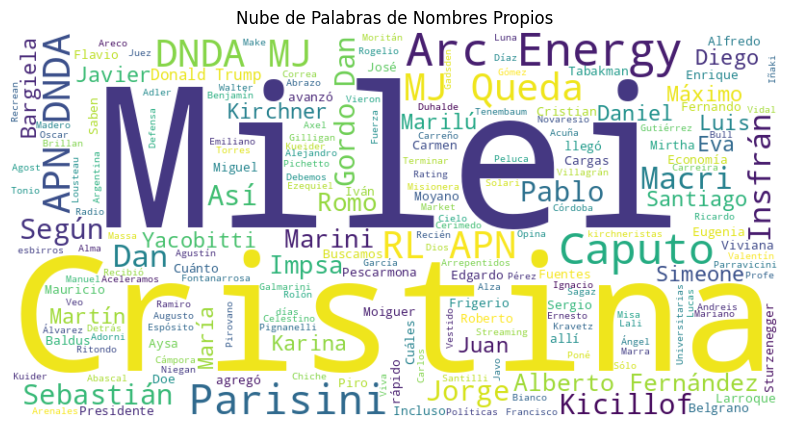

Tabla de Frecuencias de Nombres Propios:
                          Nombre Propio  Frecuencia
49                                Milei          17
0                              Cristina          14
259                              Energy          14
258                                 Arc          14
76                               Caputo          12
126                            Parisini          11
100  RL-2023-95334553-APN-DNDA#MJ.Queda           9
207                             Insfrán           6
64                                Macri           6
14                             Kicillof           5


In [ ]:
import datetime
import pandas as pd
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import re


# Definir la fecha actual
hoy = datetime.datetime.today()
fecha_hoy = datetime.datetime.strftime(hoy, '%d-%m-%Y')

def login(url_login, payload):
    session = requests.Session()
    post = session.post(url_login, data=payload)
    if post.status_code == 200:
        print("Login exitoso")
        return session
    else:
        print("Login fallido")
        return None

def scraper_noticias(url, nombre_diario, dominio, palabras_clave=None):
    consulta = requests.get(url)
    informacion_parseada = BeautifulSoup(consulta.text, 'html.parser')

    # Filtrar solo los artículos, buscando los contenedores relevantes
    informacion_filtrada = informacion_parseada.find_all('a', class_='link ln-link flex flex-column --unstyled')

    lista_titulos = []
    lista_enlaces = []

    for elemento in informacion_filtrada:
        # Obtener el título (ajustar el selector según el HTML)
        titulo_tag = elemento.find('h1') or elemento.find('h2')  # Busca h1 o h2
        enlace_tag = elemento.get('href')

        if titulo_tag:
            titulo = titulo_tag.text.strip()
        else:
            titulo = 'Sin título'  # Cambiar si no deseas asignar 'Sin título'

        if enlace_tag:
            # Si el enlace no es completo, añade el dominio
            if not urlparse(enlace_tag).scheme:
                enlace = urljoin(dominio, enlace_tag)
            else:
                enlace = enlace_tag
        else:
            enlace = 'Sin enlace'  # Cambiar si prefieres un valor distinto

        lista_titulos.append(titulo)
        lista_enlaces.append(enlace)

    # Crear un DataFrame con los títulos y enlaces
    df = pd.DataFrame({'titulos': lista_titulos, 'enlaces': lista_enlaces})

    # Guardar el DataFrame en un archivo CSV
    df.to_csv(f'tabla_{nombre_diario}_{fecha_hoy}.csv', index=False, encoding='utf-8')

    cantidad_noticias = len(lista_titulos)

    print(f'Se escrapearon {cantidad_noticias} títulos de {nombre_diario}')

    return df

def extraer_texto_noticia(session, enlace, dominio):
    try:
        if not enlace:
            print('El enlace proporcionado es None.')
            return None

        # Parsear el enlace para verificar si tiene un esquema
        parsed_url = urlparse(enlace)
        if not parsed_url.scheme:
            enlace = f'{dominio}{enlace}'  # Agregar el dominio si no tiene esquema

        # Realizar la solicitud GET
        respuesta = session.get(enlace)
        respuesta.raise_for_status()  # Verificar si la solicitud fue exitosa

        # Parsear el contenido HTML
        soup = bs4.BeautifulSoup(respuesta.text, 'html.parser')

        # Encontrar el contenido de la noticia
        contenido_noticia = soup.find('p')
        if (contenido_noticia := soup.find_all('p')):
            texto_noticia = "\n".join([p.text.strip() for p in contenido_noticia])
            return texto_noticia
        else:
            print(f'No se encontró contenido de noticia en {enlace}')
            return None

    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la noticia desde {enlace}: {str(e)}')
        return None
    except Exception as e:
        print(f'Error inesperado al procesar la noticia desde {enlace}: {str(e)}')
        return None

def contiene_palabra_clave_exacta(texto, patron):
    return bool(re.search(patron, texto, re.IGNORECASE))

# Datos de login
url_login = 'https://login.lanacion.com.ar/u/login?state=hKFo2SA2a3pjM2JUMXFXYVRLQXFjaG9SS2kyMFZ6UEs4U1BzQaFur3VuaXZlcnNhbC1sb2dpbqN0aWTZIFhNQUFNVzRmek5qdmZ2bjczTXhQM0x0N1laYlgzVmV1o2NpZNkgUDhNNndnU0pqVzNxWVR5cHhyR0ppOHZmMHVUVDNMT3c'  # URL del formulario de login
payload = {
    'username': 'xxxx',
    'password': 'xxxx'
}

# Crear una sesión autenticada
session = login(url_login, payload)
if session is None:
    raise Exception('No se pudo iniciar sesión')

# Lista de medios con el dominio
lista_medios = [
    ['https://lanacion.com.ar', 'La Nacion', 'https://lanacion.com.ar'],
]


# Crear un patrón de expresión regular para palabras exactas
patron = r'\b(?:' + '|'.join(re.escape(palabra) for palabra in palabras_clave) + r')\b'

# Iterar sobre cada medio
for medio in lista_medios:
    df_noticias = scraper_noticias(url=medio[0], nombre_diario=medio[1], dominio=medio[2])

    # Lista para almacenar los textos de noticias
    textos_noticias = []

    for index, row in df_noticias.iterrows():
        enlace = row['enlaces']
        texto_noticia = extraer_texto_noticia(session, enlace, medio[2])

        if texto_noticia:
            textos_noticias.append(texto_noticia)
        else:
            textos_noticias.append('')  # Agregar una cadena vacía si no se pudo obtener el texto

    # Verificar si la longitud de 'textos_noticias' coincide con la longitud del DataFrame
    if len(textos_noticias) == len(df_noticias):
        # Agregar la columna 'texto_noticia' al DataFrame df_noticias
        df_noticias['texto_noticia'] = textos_noticias

        # Mostrar el DataFrame con la nueva columna
        print(df_noticias.head())  # Mostrar las primeras filas para verificar

        # Guardar el DataFrame con la nueva columna en un archivo CSV
        archivo_con_texto = f'tabla_{medio[1]}_con_texto.csv'
        df_noticias.to_csv(archivo_con_texto, index=False, encoding='utf-8')

        # Cargar el DataFrame desde el archivo CSV
        df = pd.read_csv(archivo_con_texto, encoding='utf-8')

        # Aplicar la función contiene_palabra_clave_exacta a cada fila del DataFrame
        df['contiene_palabra_clave'] = df['texto_noticia'].apply(lambda x: contiene_palabra_clave_exacta(str(x), patron))

        # Filtrar las filas que contienen alguna palabra clave exacta
        df_filtrado = df[df['contiene_palabra_clave']]

        # Mostrar el DataFrame filtrado
        print(df_filtrado.head())

        # Guardar el DataFrame filtrado en un nuevo archivo CSV
        archivo_filtrado = f'tabla_{medio[1]}_filtrado.csv'
        df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')
    else:
        print(f"La longitud de 'textos_noticias' no coincide con la longitud del DataFrame de {medio[1]}.")

# Agregar la columna 'nombres_propios' al DataFrame filtrado
df_filtrado['nombres_propios'] = df_filtrado['titulos'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
archivo_filtrado = f'tabla_{medio[1]}_{fecha_hoy}_filtrado.csv'
df_filtrado.to_csv(archivo_filtrado, index=False, encoding='utf-8')

# Mostrar los nombres propios encontrados
print("Nombres propios encontrados en los titulares filtrados:")
print(df_filtrado[['titulos', 'nombres_propios']])

# Contar la cantidad de noticias filtradas
cantidad_true = df_filtrado.shape[0]

# Imprimir la cantidad de noticias filtradas
print(f'Cantidad de noticias que contienen palabras clave en {medio[1]}: {cantidad_true}')

#Porcentaje de noticias con palabras clave respecto al total
porcentaje = (cantidad_true / len(df_noticias)) * 100
print(f'El {porcentaje:.2f}% de las noticias de {medio[1]} contienen palabras clave.')

# Tokenizar los títulos filtrados, eliminar stopwords y actualizar los contadores de bigramas y trigramas
for titulo in df_filtrado['titulos']:
  tokens = [token.text for token in nlp(titulo) if token.text.lower() not in stop_words]
  bigrams = ngrams(tokens, 2)
  trigrams = ngrams(tokens, 3)

  bigrams_counter.update(bigrams)
  trigrams_counter.update(trigrams)

# Crear DataFrames para bigramas y trigramas y ordenarlas de mayor a menor
  bigrams_df = pd.DataFrame(bigrams_counter.items(), columns=['Bigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)
  trigrams_df = pd.DataFrame(trigrams_counter.items(), columns=['Trigram', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Agregar el nombre del medio como una columna en los DataFrames de bigramas y trigramas
bigrams_df['Medio'] = medio[1]
trigrams_df['Medio'] = medio[1]

# Guardar las frecuencias de bigramas y trigramas en archivos CSV con codificación utf-8
bigrams_df.to_csv(f'frecuencia_bigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')
trigrams_df.to_csv(f'frecuencia_trigrams_{medio[1]}_{fecha_hoy}.csv', index=False, encoding='utf-8')

# Unir todos los nombres propios en un solo texto
nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

# Generar el gráfico de torta
labels = ['Contienen palabras clave', 'No contienen palabras clave']
sizes = [cantidad_true, len(df_noticias) - cantidad_true]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explotar el primer segmento

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Porcentaje de noticias con palabras clave en {medio[1]}')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Guardar el gráfico como imagen
plt.savefig("grafico_torta_palabras_clave.png", dpi=300, bbox_inches='tight')

#Generar la nube de palabras con los titulares filtrados
stop_words = set(stopwords.words('spanish'))

# Unir todos los titulares filtrados en un solo texto
texto_filtrado = ' '.join(df_filtrado['titulos'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(texto_filtrado)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de Palabras de los Titulares Filtrados en {medio[1]}')
plt.show()

# Guardar la nube de palabras como archivo PNG
nube_palabras_path = f'nube_palabras_{medio[1]}_{fecha_hoy}.png'
wordcloud.to_file(nube_palabras_path)

#CODIGO PARA EXTRAER LOS NOMBRES PROPIOS DEL CSV FILTRADO DE TN

def extraer_nombres_propios_y_generar_informes(df_filtrado, nombre_archivo_salida):
    # Cargar el modelo de spaCy para el idioma específico
    nlp = spacy.load('es_core_news_sm')

    # Extraer nombres propios y crear una nueva columna en el DataFrame
    df_filtrado['nombres_propios'] = df_filtrado['texto_noticia'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'PER'])

    # Mostrar los nombres propios encontrados
    print("Nombres propios encontrados en los textos filtrados:")
    print(df_filtrado[['texto_noticia', 'nombres_propios']])

    # Guardar el DataFrame filtrado con la nueva columna en un nuevo archivo CSV
    df_filtrado.to_csv(nombre_archivo_salida, index=False, encoding='utf-8')

    # Unir todos los nombres propios en un solo texto
    nombres_propios_texto = ' '.join(df_filtrado['nombres_propios'].apply(lambda x: ' '.join(x)))

    # Verificar si hay nombres propios
    if nombres_propios_texto.strip():  # Si el texto no está vacío
        # Crear la nube de palabras para los nombres propios
        wordcloud_nombres_propios = WordCloud(stopwords=set(stopwords.words('spanish')), background_color='white', width=800, height=400).generate(nombres_propios_texto)

        # Mostrar la nube de palabras para los nombres propios
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_nombres_propios, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras de Nombres Propios')
        plt.show()

        # Guardar la nube de palabras de nombres propios como archivo PNG
        nube_palabras_nombres_path = f'nube_nombres_propios_{medio[1]}_{fecha_hoy}.png'
        wordcloud_nombres_propios.to_file(nube_palabras_nombres_path)

        # Generar una tabla de frecuencias de los nombres propios
        nombres_frecuencia = Counter(nombres_propios_texto.split())
        df_frecuencia_nombres = pd.DataFrame(nombres_frecuencia.items(), columns=['Nombre Propio', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

        # Mostrar la tabla de frecuencias
        print("Tabla de Frecuencias de Nombres Propios:")
        print(df_frecuencia_nombres.head(10))  # Mostrar las 10 frecuencias más altas

        # Guardar la tabla de frecuencias en un archivo CSV
        archivo_frecuencia = nombre_archivo_salida.replace('.csv', '_frecuencia_nombres.csv')
        df_frecuencia_nombres.to_csv(archivo_frecuencia, index=False, encoding='utf-8')

        return df_filtrado, df_frecuencia_nombres
    else:
        print("No se encontraron nombres propios en las noticias filtradas.")
        return df_filtrado, pd.DataFrame(columns=['Nombre Propio', 'Frecuencia'])  # Devolver un DataFrame vacío

#LLAMA A LA FUNCIÓN PARA GENERAR NUBES DE PALABRAS Y FRECUENCIA SIEMPRE QUE HAYA NOMBRES PROPIOS
df_filtrado, df_frecuencia_nombres = extraer_nombres_propios_y_generar_informes(df_filtrado, f'tabla_{medio[1]}_filtrado_con_nombres.csv')

#DESCARGAR TODOS LOS ARCHIVOS
Si se necesita trabajar en el entorno local o revisar los resultados, esta porción de código permite hacer la descarga de todos los csv y png generados anteriormente

In [ ]:
import os
from google.colab import files

# Ruta donde guardamos los archivos
carpeta_destino = '/content/'

# Buscar todos los archivos CSV y PNG en la carpeta de destino
archivos_a_descargar = [f for f in os.listdir(carpeta_destino) if f.endswith('.csv') or f.endswith('.png')]

# Descargar todos los archivos encontrados
for archivo in archivos_a_descargar:
    archivo_path = os.path.join(carpeta_destino, archivo)
    files.download(archivo_path)  # Descarga el archivo automáticamente
    print(f'Descargando: {archivo}')  # Mensaje de


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_trigrams_TN_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_palabras_Infobae_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_filtrado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_nombres_propios_TN_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_TN_filtrado_con_nombres_frecuencia_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_15-12-2024_filtrado_con_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_palabras_TN_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_trigrams_La Nacion_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_filtrado_con_nombres_frecuencia_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_15-12-2024_filtrado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_TN_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_TN_15-12-2024_con_texto.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_15-12-2024_filtrado_con_nombres_frecuencia_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_bigrams_Infobae_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_nombres_propios_La Nacion_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_15-12-2024_filtrado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: grafico_torta_palabras_clave.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_TN_filtrado_con_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_nombres_propios_Infobae_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_trigrams_Infobae_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_fecha_hoy_filtrado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: nube_palabras_La Nacion_15-12-2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_bigrams_La Nacion_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_TN_15-12-2024_filtrado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_filtrado_con_nombres.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_Infobae_15-12-2024_con_texto.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: frecuencia_bigrams_TN_15-12-2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: tabla_La Nacion_con_texto.csv
